In [ ]:
#spam detection using machine learning Naive bayes classifier by Vinayak Bhosale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("C:\\Udemy course\\vinayak's folder\\data set\\spam vs ham\\spam.csv",error_bad_lines = False,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace =True)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df = df.rename(columns = {"v1":"type","v2":"message"})

In [19]:
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
def converter(col):
    if col =="spam":
        return 1
    else:
        return 0

In [21]:
df["spam/ham"] = df["type"].apply(converter)

In [22]:
df

,type,message,spam/ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 3 columns):
type        5572 non-null object
message     5572 non-null object
spam/ham    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 174.1+ KB


In [25]:
df.describe()

,spam/ham
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


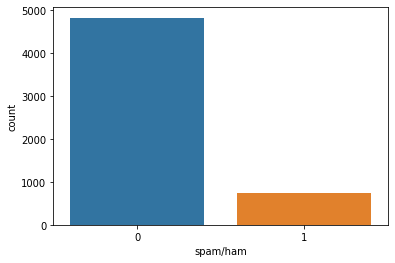

In [27]:
sns.countplot(df["spam/ham"],label = "count spam vs ham")

In [33]:
spam_percent = (len(df[df["spam/ham"]==1])/len(df))*100
spam_percent

13.406317300789663

In [34]:
ham_percent = (len(df[df["spam/ham"]==0])/len(df))*100
ham_percent

86.59368269921033

In [36]:
import string
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [37]:
def cleaner(col):
    alphabet_list = [char for char in col if char not in punc]
    joined_message = "".join(alphabet_list)
    return joined_message

In [40]:
df["clean_message"] = df["message"].apply(cleaner)

df.head()

,type,message,spam/ham,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...


In [46]:
df.iloc[5]["clean_message"]

'FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send å£150 to rcv'

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

message_vector = vectorizer.fit_transform(df["clean_message"])

message_vector[:10]

<10x9489 sparse matrix of type '<class 'numpy.int64'>'
	with 172 stored elements in Compressed Sparse Row format>

In [52]:
message_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [103]:
vectorizer.get_feature_names()[:10]

['008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089']

In [93]:
X = message_vector
y = df["spam/ham"].values

In [94]:
y.shape

(5572,)

In [95]:
X.shape

(5572, 9489)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [114]:
X_train.shape

(3900, 9489)

In [119]:
X_test.shape

(1672, 9489)

In [97]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB()

In [98]:
y_predictions = model.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,y_predictions))
print("."*70)
print(classification_report(y_test,y_predictions))
print("."*70)
print(accuracy_score(y_test,y_predictions))

[[1428   19]
 [  14  211]]
......................................................................
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1447
           1       0.92      0.94      0.93       225

    accuracy                           0.98      1672
   macro avg       0.95      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672

......................................................................
0.9802631578947368


Text(0, 0.5, 'Predicted value')

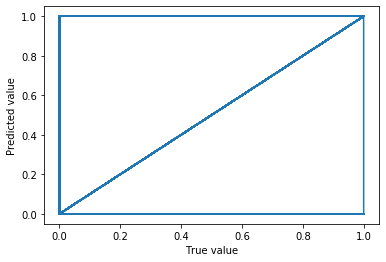

In [121]:
plt.plot(y_test,y_predictions)
plt.xlabel("True value")
plt.ylabel("Predicted value")